<a href="https://colab.research.google.com/github/unknown-jun/Data-Visualization/blob/main/B12_Language_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미리 학습된 언어 모델
BERT, GPT 등의 모델을 사용하면 문서 분류, 개체명 인식 등 많은 테스크들에서 좋은 성능을 낼 수 있는데, 이들의 공통점은 pre-training(미리 학습된) 언어모델이라는 점이다. 왜 프리트레인 모델이 성능이 좋은 것일까?

## 언어 모델
언어 모델(Language Model)이란 단어 시퀀스에 확률을 부여하는 모델이다. 문장에서 $i$번째로 등장하는 단어를 $w_i$로 표시한다면 $n$개 단어로 구성된 문장이 해당 언어에서 등장할 확률, 즉 언어 모델의 출력은 다음 수식처럼 쓸 수 있다.

<p align="center">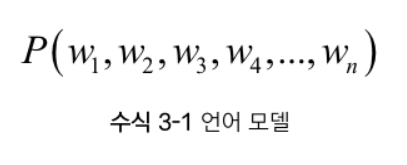</p>

이 수식은 $n$개 단어가 동시에 나타날 **결합확률(joint probability)**을 의미한다. 잘 학습된 한국어 모델이 있다면 $P(\text{무모}|\text{운전})$보다는 $P(\text{난폭} | \text{운전})$이 큰 확률값을 지닐 것이다.
- $P(\text{난폭} | \text{운전})$: '난폭이라는 단어와 '운전'이라는 단어가 동시에 나타날 결합확률을 뜻함


그렇다면 난폭이 나타난 다음에 운전이 나타날 확률은 어떻게 정의할까? 이러한 확률을 조건부 확률이라 하며, 다음과 같이 정의할 수 있다.  
<p align="center">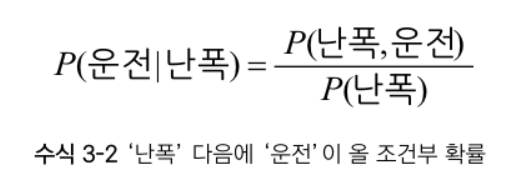</p>

조건부 확률을 표기할 때 결과가 되는 사건(운전)을 앞에, 조건이 되는 사건(난폭)을 뒤에 쓴다. 조건이 되는 사건이 우변 분자의 일부, 그리고 우변 분모를 구성하고 있음을 볼 수 있다. 이는  결과가 되는 사건(운전)은 조건이 되는 사건(난폭)의 영향을 받아 변한다는 개념을 내포하고 있다. 

결합확률과 조건부 확률 사이에는 밀접한 관계가 있다. 조건부 확률의 정의에 따라 단어 3개가 동시에 등장할 결합확률을 수식으로 나타내면 다음과 같다.
<p align="center">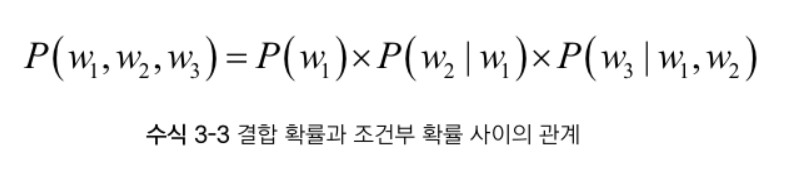</p>

수식 3-2 조건부 확률의 정의에 따라 수식 3-3의 우변을 쭉 펼쳐 계산해 보면 좌변과 같다. 이를 직관적으로 본다면, 단어 3개로 구성된 문장이 나타나려면(즉, 단어 3개가 동시에 등장하려면) 다음 세 가지 사건(event)이 동시에 일어나야 한다는 말이다.
- 첫 번째 단어($w_1$) 등장
- 첫 번째 단어 등장($w_1$) 후 두 번째 단어($w_2$) 등장
- 첫 번째 단어($w_1$)와 두 번째 단어($w_2$) 등장 후 세 번째 단어($w_3$) 등장

<p align="center">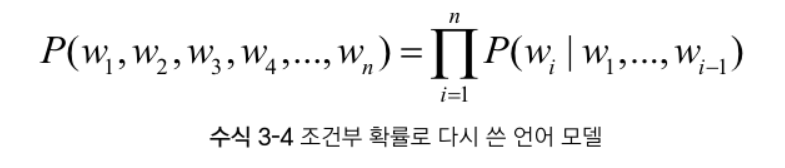</p>

이로부터 수식 3-1의 언어 모델을 조건부 확률 개념으로 다시 쓰면 다음 수식과 같다. 요약 하면 **<span style="color: 2D3748; background-color:#fff5b1;">전체 단어 시퀀스가 나타날 확률</span>**(다음 수식 좌변)**<span style="color: 2D3748; background-color:#fff5b1;">은 이전 단어들이 주어졌을 때 다음 단어가 등장할 확률의 연쇄</span>**(다음 수식 우변)와 같다는 뜻이다.